## 1. Loading the Dataset




 

Now, lets get started by importing important packages and the dataset.

**1.1 Import the necessary Python modules**

In [ ]:
# Load python modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection



In [ ]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))


**1.2 Load Dataset **


Using pandas to load the data and explore the data both with descriptive statistics and data visualization.


In [ ]:
# Load dataset from local drive (for colab notebook)
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file: remember to choose the right one!
data = pd.read_csv(io.BytesIO(uploaded['processed_reviews_split_surnamesABCD_minimal.csv']))




Saving processed_reviews_split_surnamesABCD_minimal.csv to processed_reviews_split_surnamesABCD_minimal (2).csv


**1.2.1 Inspect Dataset **

**1.2.1.1 Dimensions of Dataset **


# 2. DATA EXPLORATION

In [ ]:
# list of column titles 
print(data.columns)

Index(['review_id', 'text', 'confidence_score', 'review_score',
       'acceptance_status'],
      dtype='object')


In [ ]:
# list of column (field) data types
print(data.dtypes)

# Note: object is 

review_id             object
text                  object
confidence_score     float64
review_score         float64
acceptance_status     object
dtype: object


# **2.1 Taking a peek at the Dataset **

Python replaces empty/missing fields in the data with "NaN".
**bold text**

In [ ]:
# showing the first N rows in a dataframe with the function "head"
data.head(10)
# 2nd, 3rd,7thto 9th row has a missing value



,review_id,text,confidence_score,review_score,acceptance_status
0,iclr_review_0000,Predicting Medications from Diagnostic Codes w...,3.0,6.0,Accept
1,iclr_review_0001,Unrestricted Adversarial Examples via Semantic...,NaN,6.0,Accept
2,iclr_review_0002,#. #. #. #,NaN,6.0,Accept
3,iclr_review_0003,Sufficient Conditions for Robustness to Advers...,3.0,5.0,Reject
4,iclr_review_0004,Unsupervised Learning of the Set of Local Maxi...,3.0,8.0,Accept
5,iclr_review_0005,Global Optimality Conditions for Deep Neural N...,4.0,7.0,Accept
6,iclr_review_0006,Gaussian Process Behaviour in Wide Deep Neural...,4.0,6.0,Accept
7,iclr_review_0007,Neural-Guided Symbolic Regression with Asympto...,NaN,8.0,Reject
8,iclr_review_0008,Lazy-CFR: fast and near-optimal regret minimiz...,NaN,8.0,Accept
9,iclr_review_0009,Learning Functionally Decomposed Hierarchies f...,NaN,6.0,Reject


In [ ]:
# To show a random subset of the data with the function "sample":
data.sample(10)

,review_id,text,confidence_score,review_score,acceptance_status
2968,iclr_review_2968,GraphSeq2Seq: Graph-Sequence-to-Sequence for N...,3.0,6.0,Reject
3043,iclr_review_3043,Mean-field Behaviour of Neural Tangent Kernel ...,NaN,3.0,Reject
605,iclr_review_0605,Adversarial Imitation Attack. Deep learning mo...,NaN,3.0,Reject
1686,iclr_review_1686,Nonparametrically Learning Activation Function...,4.0,5.0,Accept
2560,iclr_review_2560,NaN,4.0,7.0,Accept
3252,iclr_review_3252,Revisiting Fine-tuning for Few-shot Learning. ...,NaN,3.0,NaN
1085,iclr_review_1085,Visceral Machines: Risk-Aversion in Reinforcem...,5.0,7.0,Accept
4417,iclr_review_4417,"Unsupervised Disentanglement of Pose, Appearan...",NaN,6.0,Reject
553,iclr_review_0553,A Dynamic Approach to Accelerate Deep Learning...,NaN,3.0,Reject
1443,iclr_review_1443,Faster Distributed Synchronous SGD with Weak S...,4.0,3.0,Reject


# 2.2  The Summary statistics for numerical features

In [ ]:
# The Summary statistics for numerical features
data.describe()


,confidence_score,review_score
count,3318.000000,6119.000000
mean,3.795057,4.689492
std,0.815260,2.192145
min,1.000000,-1.000000
25%,3.000000,3.000000
50%,4.000000,5.000000
75%,4.000000,6.000000
max,5.000000,10.000000


# 2.3 To find out how many missing values (or NaN values) there are in each feature, using Pandas `isna()` function. 

In [ ]:
# Number of missing values per column
data.isna().sum()

review_id               0
text                   84
confidence_score     2801
review_score            0
acceptance_status     390
dtype: int64

## **2.3.1 Remove all rows that contain missing data**


In [ ]:
# remove all rows with missing data
# dropna removes all rows that contain at least one missing value
print(f'Original dataset length: {len(data)}')
data = data.dropna()
print(f'Dataset length after removing missing rows: {len(data)}')
print()
print(data[['review_id']].head(5))
data.head(5)



Original dataset length: 6119
Dataset length after removing missing rows: 3275

          review_id
0  iclr_review_0000
3  iclr_review_0003
4  iclr_review_0004
5  iclr_review_0005
6  iclr_review_0006


,review_id,text,confidence_score,review_score,acceptance_status
0,iclr_review_0000,Predicting Medications from Diagnostic Codes w...,3.0,6.0,Accept
3,iclr_review_0003,Sufficient Conditions for Robustness to Advers...,3.0,5.0,Reject
4,iclr_review_0004,Unsupervised Learning of the Set of Local Maxi...,3.0,8.0,Accept
5,iclr_review_0005,Global Optimality Conditions for Deep Neural N...,4.0,7.0,Accept
6,iclr_review_0006,Gaussian Process Behaviour in Wide Deep Neural...,4.0,6.0,Accept


# *2.3.2 Remove specific rows**

We can drop specific rows by passing index labels to the drop method.

In [ ]:
# remove selected column

print(data.drop("text", axis=1))

             review_id  confidence_score  review_score acceptance_status
0     iclr_review_0000               3.0           6.0            Accept
3     iclr_review_0003               3.0           5.0            Reject
4     iclr_review_0004               3.0           8.0            Accept
5     iclr_review_0005               4.0           7.0            Accept
6     iclr_review_0006               4.0           6.0            Accept
...                ...               ...           ...               ...
6112  iclr_review_6112               4.0           5.0            Reject
6113  iclr_review_6113               4.0           7.0            Accept
6114  iclr_review_6114               3.0           7.0            Accept
6116  iclr_review_6116               4.0           6.0            Reject
6117  iclr_review_6117               4.0           3.0            Reject

[3275 rows x 4 columns]


In [ ]:
data.head(3)

,review_id,text,confidence_score,review_score,acceptance_status
0,iclr_review_0000,Predicting Medications from Diagnostic Codes w...,3.0,6.0,Accept
3,iclr_review_0003,Sufficient Conditions for Robustness to Advers...,3.0,5.0,Reject
4,iclr_review_0004,Unsupervised Learning of the Set of Local Maxi...,3.0,8.0,Accept


# 2.4 Further exploratory using the bar chat





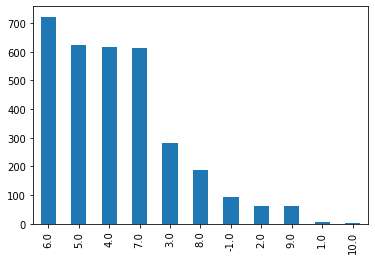

In [ ]:
score = data.review_score.value_counts().plot(kind='bar')

fig = score.get_figure()

fig.savefig("score.png");

In [ ]:
data.shape

(3275, 5)

3.1 #NEXT IS TFID VECTORISZER
# Using tfidf conversion function. We discard tokens that appear in more than half the documents (max_df)
 We discard tokens that appear in less than 10 documents (min_df)
We only use unigrams (ngram_range)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df= 10, stop_words="english", 
                             ngram_range= (1,1))#, sublinear_tf=True)
# fit on and apply to training data
X = vectorizer.fit_transform(data['text'])
y=data['acceptance_status']

In [ ]:
print(X)

  (0, 4673)	0.05796956868217538
  (0, 1104)	0.046901458806378665
  (0, 3544)	0.04490611716736125
  (0, 2353)	0.05228048059329899
  (0, 1069)	0.08634685968762751
  (0, 3120)	0.025592580038584146
  (0, 2984)	0.03951896411315237
  (0, 400)	0.042025478642245734
  (0, 569)	0.0842297055364024
  (0, 3987)	0.07212293485398621
  (0, 2971)	0.04911630932884475
  (0, 1912)	0.060418328393127135
  (0, 2236)	0.055092145378295834
  (0, 170)	0.0727904844954055
  (0, 264)	0.05188742566166973
  (0, 1613)	0.09593495229082306
  (0, 698)	0.0869271238814221
  (0, 399)	0.0432714716860649
  (0, 2628)	0.05530003882884267
  (0, 2663)	0.06311574673814682
  (0, 964)	0.04967820624472587
  (0, 3616)	0.06409427456419738
  (0, 5046)	0.09400776443582887
  (0, 1612)	0.08691671273251463
  (0, 2495)	0.06356941868608881
  :	:
  (3274, 1864)	0.027013405510731777
  (3274, 3712)	0.03387379538010176
  (3274, 3324)	0.022394384472451387
  (3274, 1440)	0.05008840713602383
  (3274, 597)	0.05086621401430216
  (3274, 3544)	0.0382334

#3.2  Binary Classificaion

In [ ]:
data['binary_category'] = data['acceptance_status'].factorize()[0]
y= data['binary_category']
print(y.shape)

(3275,)


#4.1 Training the data dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(y_train.shape)

(2292,)


# 5.1.  Modelling with Logistics Regression with Hyper-parameter tunning.(Using GridSearchCV)
GridSearchCV is a convenient function in scikit-learn that helps us fine-tune the hyper-parameters of our ML mod

In [ ]:
#Logistic analysis Modeling
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

# hyper-parameter tuning using in-built GridSearchCV
# pipeline is used to standardisation and also creating the normal instance of a LogisticRegression
# This may take a while: good to set the max_iter parameter as well...
param_grid=[{'C': np.logspace(-4,4,15)}, #inverse of regularization strength
           {'penalty': ['l1', 'l2']},
           {'solver': ['lbfgs', 'liblinear', 'adam']},
          {'max_iter': [10000]}] #we set this low to speed things up

lr = LogisticRegression(class_weight='balanced')


grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='recall', refit=True) # you can change scoring function that will impact the estimator
grid = grid.fit(X_train, y_train)
print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}\nScorer: {}'.format(grid.best_estimator_, 
                                                                                           grid.best_estimator_.coef_, 
                                                                                           grid.best_estimator_.intercept_,
                                                                                           grid.best_params_, 
                                                                                           grid.scorer_))
print('Available parameters for the estimator (fine-tuning): ',lr.get_params().keys())

Best estimator: LogisticRegression(C=719.6856730011514, class_weight='balanced')
Weights: [[ 0.00835233  0.11992895  1.06972178 ...  1.28839292 -1.10583722
  -0.13483108]], Intercept: [-0.61036768]
Best params: {'C': 719.6856730011514}
Scorer: make_scorer(recall_score, average=binary)
Available parameters for the estimator (fine-tuning):  dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:
lr = LogisticRegression(C=719.7, class_weight='balanced')
model=lr.fit(X_train,y_train)

In [ ]:
print(x_test)

  (0, 2747)	0.039702727380389
  (0, 138)	0.079405454760778
  (0, 3439)	0.03883259100141582
  (0, 4925)	0.03115742707423479
  (0, 78)	0.03883259100141582
  (0, 2852)	0.035487989280714574
  (0, 1857)	0.039252107797007614
  (0, 5361)	0.037395209710420825
  (0, 601)	0.03650377530002335
  (0, 3677)	0.0350373696973332
  (0, 5438)	0.039252107797007614
  (0, 5423)	0.040718513399697766
  (0, 552)	0.079405454760778
  (0, 788)	0.033680527090455825
  (0, 1642)	0.03678664405833733
  (0, 4352)	0.035726474033534315
  (0, 1450)	0.03883259100141582
  (0, 5348)	0.03385678817829105
  (0, 1169)	0.29666653312329344
  (0, 4944)	0.033680527090455825
  (0, 3937)	0.03844015924728905
  (0, 1548)	0.03844015924728905
  (0, 1294)	0.035974695508618766
  (0, 1173)	0.03151173593385989
  (0, 3377)	0.03708331664041168
  :	:
  (982, 5040)	0.04389053339003981
  (982, 4248)	0.08153338562359493
  (982, 1367)	0.04586596779263486
  (982, 3969)	0.03526167041478821
  (982, 2991)	0.028114860033312258
  (982, 2619)	0.04344737482

In [ ]:
y_predict=lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       422
           1       0.76      0.79      0.77       561

    accuracy                           0.74       983
   macro avg       0.73      0.73      0.73       983
weighted avg       0.74      0.74      0.74       983



In [ ]:
data['acceptance_status'].value_counts()

data.columns

Index(['review_id', 'text', 'confidence_score', 'review_score',
       'acceptance_status', 'binary_category'],
      dtype='object')

In [ ]:
#2nd Analysis
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df= 10, stop_words="english", 
                             ngram_range= (1,1))#, sublinear_tf=True)
# fit on and apply to training data
X = vectorizer.fit_transform(data['text'])
y_2=data['review_score']

In [ ]:
x_train, x_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size=0.3)
print(y_train.shape)

(2292,)


In [ ]:
#Second model algorthm model - support vector machine
from sklearn import svm
clf = svm.SVC()



In [ ]:
clf.fit(x_train, y_2_train)

SVC()

In [ ]:
y_2_predict = clf.predict(x_test)
print(classification_report(y_2_test,y_2_predict))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        24
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        23
         3.0       0.33      0.01      0.02        92
         4.0       0.31      0.24      0.27       184
         5.0       0.17      0.30      0.22       155
         6.0       0.27      0.45      0.34       233
         7.0       0.30      0.26      0.28       184
         8.0       0.25      0.02      0.03        65
         9.0       0.00      0.00      0.00        20
        10.0       0.00      0.00      0.00         1

    accuracy                           0.25       983
   macro avg       0.15      0.12      0.11       983
weighted avg       0.25      0.25      0.22       983



EVALUATION 

In [ ]:
#To wrap common procedures into functions for ease of re-usability

def evaluate_classifier(grid, X_train, y_train, X_test, y_test):
    # model evaluation for training set
    y_train_predict = grid.predict(X_train)
    print("Training SET")
    print("--------------------------------------")
    print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_train, y_train_predict), 
                                                                                        precision_score(y_train, y_train_predict), 
                                                                                        recall_score(y_train, y_train_predict), 
                                                                                        f1_score(y_train, y_train_predict)))
    print("Confusion Matrix:\n {}".format(confusion_matrix(y_train, y_train_predict)))

    # model evaluation for testing set
    y_test_predict = grid.predict(X_test)

    print("\nTesting SET")
    print("--------------------------------------")
    print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_test, y_test_predict), 
                                                                                        precision_score(y_test, y_test_predict), 
                                                                                        recall_score(y_test, y_test_predict), 
                                                                                        f1_score(y_test, y_test_predict)))
    print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_test_predict)))
    return y_train_predict, y_test_predict

y_train_predict, y_test_predict = evaluate_classifier(grid, X_train, y_train, x_test, y_test)

Training SET
--------------------------------------
Accuracy: 0.993, Precision: 1.000, Recall: 0.988, F1 Score: 0.994
Confusion Matrix:
 [[ 901    0]
 [  16 1375]]

Testing SET
--------------------------------------
Accuracy: 0.487, Precision: 0.550, Recall: 0.563, F1 Score: 0.556
Confusion Matrix:
 [[163 259]
 [245 316]]


More Evaluation using the Roc Curve

ROC AUC (Training)=1.000
ROC AUC (Testing)=0.467


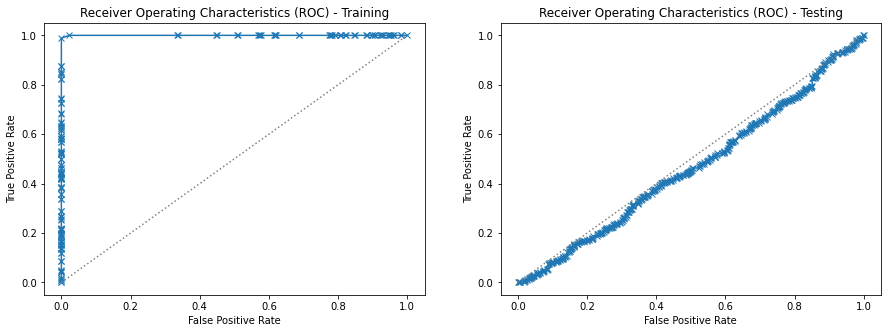

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc_classifier(grid, X_train, y_train, X_test, y_test):
    # predict probabilities
    lr_probs_train = grid.predict_proba(X_train)
    lr_probs_test = grid.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs_train = lr_probs_train[:, 1]
    lr_probs_test = lr_probs_test[:, 1]

    print('ROC AUC (Training)={:.3f}'.format(roc_auc_score(y_train, lr_probs_train)))
    print('ROC AUC (Testing)={:.3f}'.format(roc_auc_score(y_test, lr_probs_test)))

    # compute false positive and true positive rates
    lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train, lr_probs_train)
    lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test, lr_probs_test)

    # plot the roc curve for the training set
    _ = plt.figure(figsize=(15, 5))
    ax1 =plt.subplot(121)
    _ = ax1.plot(lr_fpr_train, lr_tpr_train, marker='x')
    _ = ax1.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
    _ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training')
    _ = ax1.set_xlabel('False Positive Rate')
    _ = ax1.set_ylabel('True Positive Rate')

    # plot the roc curve for the testing set
    ax2 = plt.subplot(122)
    _ = ax2.plot(lr_fpr_test, lr_tpr_test, marker='x')
    _ = ax2.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
    _ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing')
    _ = ax2.set_xlabel('False Positive Rate')
    _ = ax2.set_ylabel('True Positive Rate')

    return (lr_probs_train, lr_fpr_train, lr_tpr_train, 
            lr_probs_test,  lr_fpr_test, lr_tpr_test)

lr_probs_train, lr_fpr_train, lr_tpr_train, lr_probs_test, lr_fpr_test, lr_tpr_test = roc_classifier(
                                                                    grid, X_train, y_train, x_test, y_test)

In [ ]:
def exclusion(text, review_score, acceptance_status):
  value = 1
  if text == ' ' or review_score == ' ' or acceptance_status == ' ':
    value = 1
  else:
      value = 0
  return value

In [ ]:
data['excluded'] =data[['text', 'review_score','acceptance_status']].apply(lambda X : exclusion(*X), axis = 1)

In [ ]:
def reason(row):
  if row['excluded'] == 1:
    return 'missing_value'
  else:
    return 'N/A'

In [ ]:
data['reason_for_exclusion'] = data.apply(lambda row: reason(row), axis=1)

In [ ]:
data.to_csv('reason_for_exclusion.csv')